In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [ ]:
#open the data
df = pd.read_csv('fb457bdb5d2e3d16b3e18d4d719589b2ea70ca4227df93c3659db5a5.csv') 

#separate the date into two separate columns
def month_day(dat):
    year=dat[:4]
    month_day=dat[5:]
    return  month_day
def year(dat):
    year=dat[:4]
    month_day=dat[5:]
    return  year

df['month_day'] = df['Date'].apply(month_day) #new column with month and day
df['year']=df['Date'].apply(year)            #new column with year
df.dropna()

#split the data into high and low
df_high=df.where((df['Element']=='TMAX') & (df['year'] != '2015')) #new data frame with only high values
df_low=df.where((df['Element']=='TMIN')& (df['year'] != '2015')) #new data frame with only low values

#group the same days for each year and find the average 
df_high_2=df_high.groupby('month_day').agg({'Data_Value': np.max}).reset_index()  
df_low_2=df_low.groupby('month_day').agg({'Data_Value': np.min}).reset_index()    
df_all = pd.merge(df_high_2, df_low_2, how='inner', on = 'month_day')
df_high_date = df_all [["month_day" , "Data_Value_x"]].rename(columns={"Data_Value_x": "Data_Value"})
df_low_date = df_all [["month_day" , "Data_Value_y"]].rename(columns={"Data_Value_y": "Data_Value"})


df_high_date=df_high_date.drop([59]).reset_index()     #to remove 29th of february
df_low_date=df_low_date.drop([59]).reset_index()

<IPython.core.display.Javascript object>


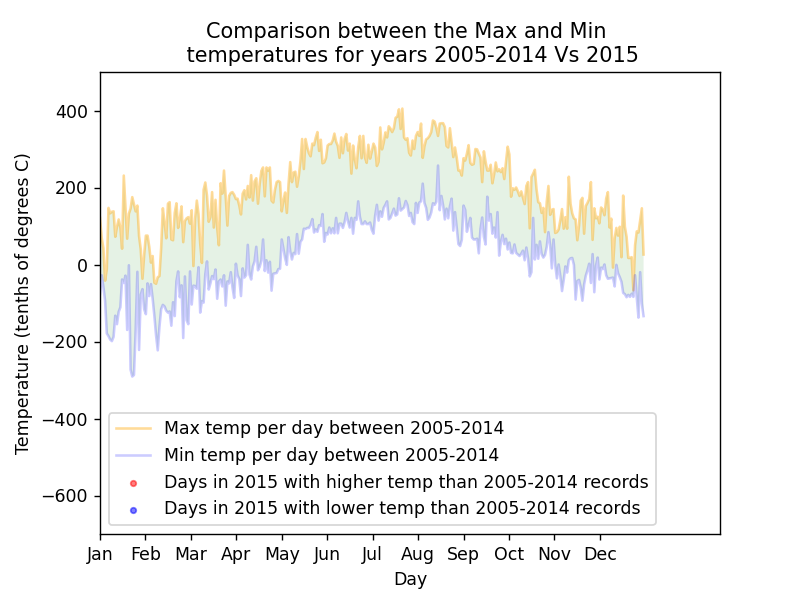

In [3]:
#get data to be plotted
dates=df_high_date['month_day'].tolist()    #set the date values in a list
high_list=df_high_date['Data_Value'].tolist()#set the high values in a list
low_list= df_low_date['Data_Value'].tolist() #set the low values in a list


#high_list= [x / 10 for x in high_list]    #to convert to celecious
#low_list= [x / 10 for x in low_list]


#rename the x-axis
my_xticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
steps=[]
for i in range(0, len(my_xticks)) :
    step=(len(high_list))*i/(len(my_xticks))
    steps.append(step)
    
#plot the data    
plt.xticks(steps, my_xticks)
plt.plot(high_list, '-', c='orange',alpha=0.4,label='Max temp per day between 2005-2014')
plt.plot(low_list, '-', c= 'blue', alpha=0.2,label='Min temp per day between 2005-2014')
plt.gca().fill_between(range(len(high_list)), 
                       high_list, low_list, 
                       facecolor='green', 
                       alpha=0.1)


ax = plt.gca()
ax.axis([0,365,-700,500])


#2015 data 
df_2015_high=df[(df['year']=='2015') & (df['Element']=='TMAX')].dropna()
df_2015_low =df[(df['year']=='2015') & (df['Element']=='TMIN')].dropna()


df_2015_high=df_2015_high.groupby('month_day').agg({'Data_Value': np.max}).reset_index()  #length of the dataframe = 365
df_2015_low =df_2015_low.groupby ('month_day').agg({'Data_Value': np.min}).reset_index()  #length of the dataframe = 365

#data to be plotted
broke_high=[]
broke_low=[]
index1=[]
index2=[]


#find the data above the limit
for i in range(0, len(df_2015_high)):
    if(df_2015_high['Data_Value'][i] >df_high_date['Data_Value'][i]):
        broke_high.append(df_2015_high['Data_Value'][i])
        index1.append(i)

      
        
    if(df_2015_low['Data_Value'][i] <df_low_date['Data_Value'][i]):
        broke_low.append(df_2015_low['Data_Value'][i])
        index2.append(i)
    
     
#scatter plot    
plt.scatter(index1, broke_high, s=10, c='red', alpha=0.5, label='Days in 2015 with higher temp than 2005-2014 records')
plt.scatter(index2, broke_low, s=10, c='blue', alpha=0.5, label='Days in 2015 with lower temp than 2005-2014 records')


plt.xlabel('Day')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('Comparison between the Max and Min \n temperatures for years 2005-2014 Vs 2015')
plt.legend()